In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from scipy.spatial import distance
from sklearn.datasets import make_blobs

In [32]:
import pickle

def load_embeddings(pickle_file_path):
    with open(pickle_file_path, 'rb') as pickle_file:
        loaded_data_dict = pickle.load(pickle_file)

    # Convert lists to numpy arrays
    data = loaded_data_dict["embedding"]
    labels = np.array(loaded_data_dict["target"])
    return data, labels, loaded_data_dict

In [39]:
# Exemplo de dados de embeddings e rótulos de clusters (substitua com seus próprios dados)
x, true_labels = make_blobs(n_samples=300, n_features=1000, centers=6, cluster_std=1.0, random_state=42)
num_clusters = 6

In [48]:
def cluster_quality(x, true_labels, num_clusters):

    kmeans = KMeans(n_clusters=num_clusters, n_init=5,random_state=42)
    predicted_labels = kmeans.fit_predict(x)

    silhouette_avg = silhouette_score(x, true_labels)
    print(f"Índice de Silhueta: {silhouette_avg}")

    # Índice Calinski-Harabasz
    ch_score = calinski_harabasz_score(x, true_labels)
    print(f"Índice Calinski-Harabasz: {ch_score}")

    # Índice Davies-Bouldin
    db_score = davies_bouldin_score(x, true_labels)
    print(f"Índice Davies-Bouldin: {db_score}")


    # Validação Externa

    # Índice de Rand
    rand_score = adjusted_rand_score(true_labels, predicted_labels)
    print(f"Índice de Rand: {rand_score}")

    # Índice Mutual Information
    mi_score = adjusted_mutual_info_score(true_labels, predicted_labels)
    print(f"Índice Mutual Information: {mi_score}")

In [49]:
cluster_quality(x, true_labels, num_clusters)

Índice de Silhueta: 0.8265436713436835
Índice Calinski-Harabasz: 1679.346811541026
Índice Davies-Bouldin: 0.24652092059801453
Índice de Rand: 1.0
Índice Mutual Information: 1.0


In [36]:
path = '../data_output/trained_embeddings/efficientnetb0_4096_triplet.pickle'

data, labels, result = load_embeddings(path)



Índice de Silhueta: 0.1192277638559795
Índice Calinski-Harabasz: 1843.4140584458096
Índice Davies-Bouldin: 2.0629911505274596
Índice de Rand: 0.11160807949622396
Índice Mutual Information: 0.19599626743386545


In [50]:
cluster_quality(data, labels, 6)

Índice de Silhueta: -0.0035962162176837093
Índice Calinski-Harabasz: 618.7761639997523
Índice Davies-Bouldin: 4.431284576496645
Índice de Rand: 0.11160807949622396
Índice Mutual Information: 0.19599626743386545


Para n_clusters = 2, o coeficiente de Silhouette médio é 0.7049437310743717
Para n_clusters = 3, o coeficiente de Silhouette médio é 0.8480303059596955
Para n_clusters = 4, o coeficiente de Silhouette médio é 0.6636976714243523
Para n_clusters = 5, o coeficiente de Silhouette médio é 0.49012744554094295
Para n_clusters = 6, o coeficiente de Silhouette médio é 0.5168058221331912


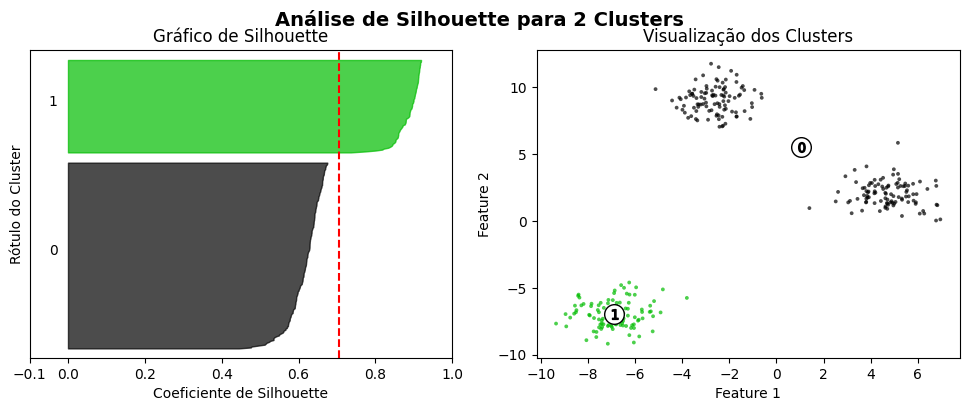

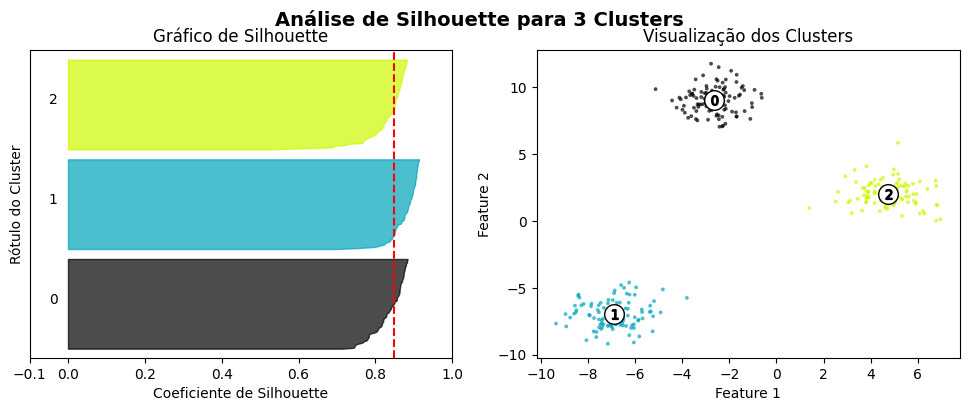

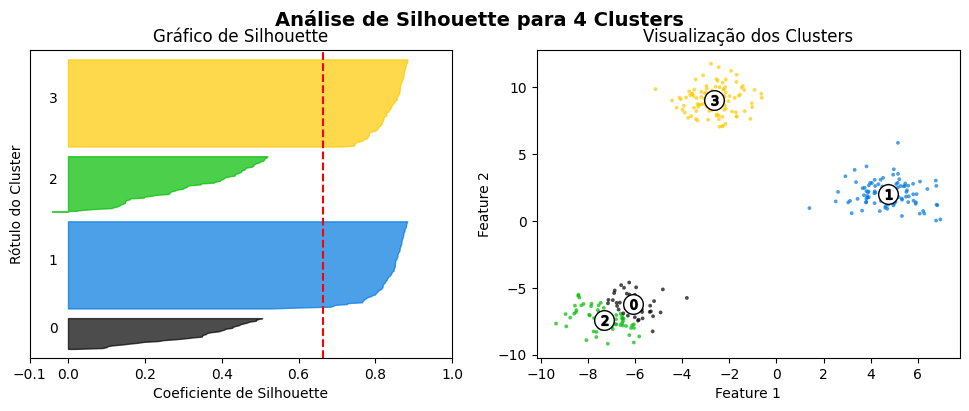

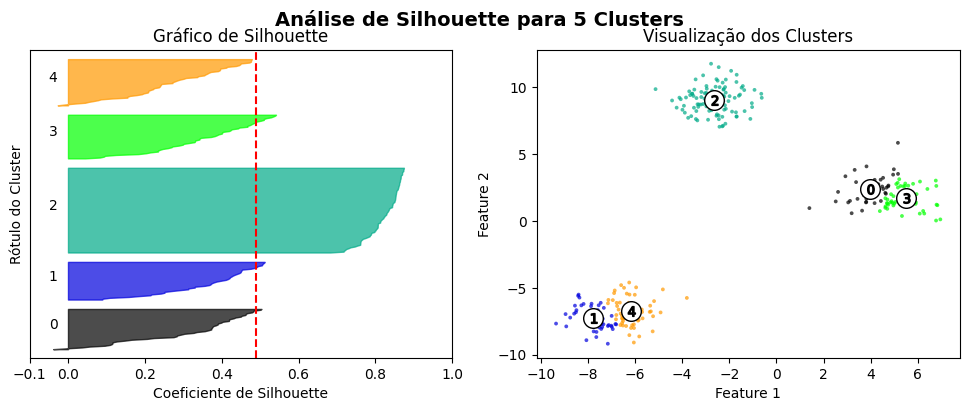

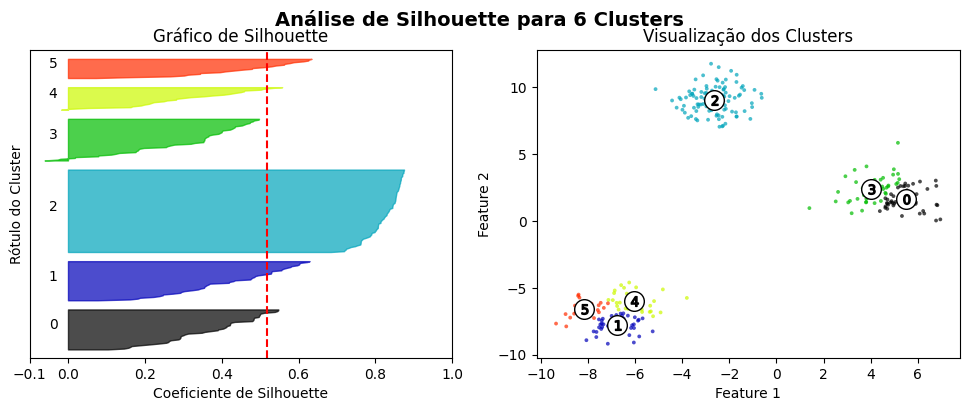

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

# Exemplo de dados de embeddings (substitua com seus próprios dados)
X, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Range de número de clusters para testar
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Criar um subgráfico para cada número de clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    # O 1º subplot é o gráfico de Silhouette
    # O coeficiente de Silhouette varia de -1 a 1, portanto, ajustamos o eixo y
    ax1.set_xlim([-0.1, 1])
    # O número de clusters a que pertence (n_clusters + 1) * 10
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar o modelo de clustering com o número de clusters desejado
    clusterer = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # Calcular o coeficiente de Silhouette para cada amostra
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, o coeficiente de Silhouette médio é {silhouette_avg}")

    # Calcular os valores de Silhouette para cada amostra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar os valores de Silhouette para amostras pertencentes ao cluster atual
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Rótulos nos gráficos de Silhouette no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular o novo y_lower para o próximo plot
        y_lower = y_upper + 10  # 10 para os espaços em branco

    ax1.set_title("Gráfico de Silhouette")
    ax1.set_xlabel("Coeficiente de Silhouette")
    ax1.set_ylabel("Rótulo do Cluster")

    # A linha vertical para o coeficiente de Silhouette médio de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpar os rótulos do eixo y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2º subplot mostra os clusters reais formados
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling dos clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização dos Clusters")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle(f"Análise de Silhouette para {n_clusters} Clusters", fontsize=14, fontweight='bold')

plt.show()


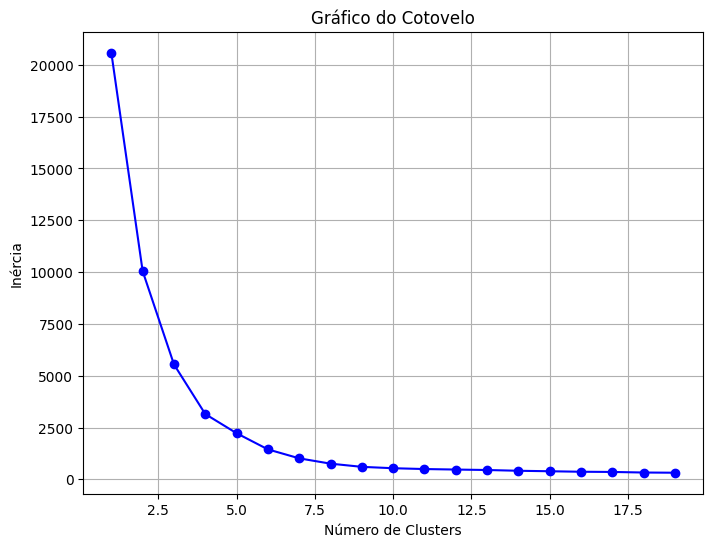

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Exemplo de dados de embeddings (substitua com seus próprios dados)
X, _ = make_blobs(n_samples=300, centers=11, cluster_std=1.0, random_state=42)

# Lista para armazenar os valores de inércia (soma dos quadrados das distâncias)
inertia_values = []

# Range de número de clusters para testar (de 1 a 10 clusters)
num_clusters_range = range(1, 20)

# Calcular a inércia para diferentes números de clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Criar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()
